# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)

In [3]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?

Здесь только 3 величины дискретны: 'CHAS',  'RAD', 'TAX'.

Все остальные - непрерывны, могут принять любое значение.

1.   Нормальное - RM, MEDV
2.   Равномерное - нет
3.   Биноминальное - TAX
4.   Бернулли - CHAS 
5.   Геометрическое - RAD (гипергеометрическое)
6.   Логнормальное - ZN, INDUS, NOX, DIS, LSTAT


In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,5

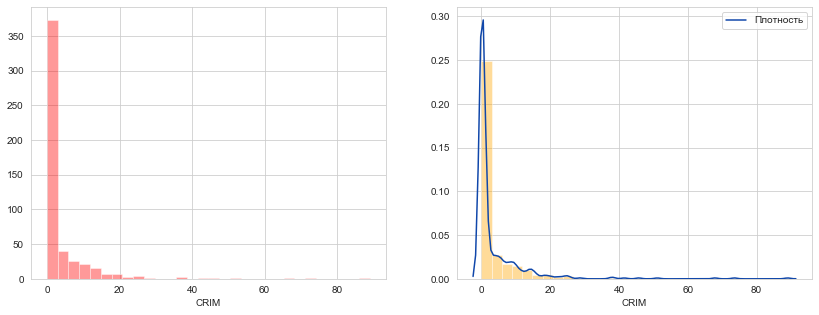

In [5]:
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(data['CRIM'], bins=30, kde=False,
             hist_kws={'color':'r'},
             ax=ax1
            )

sns.distplot(data['CRIM'], bins=30, kde=True,
             hist_kws={'color':'#FFA500'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
             ax=ax2
            )
plt.show()

CRIM - непрерывная величина, распределение экспоненциальное
****

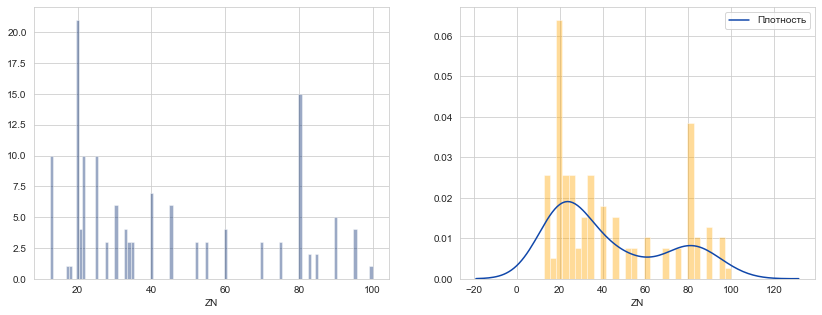

In [6]:
f, (ax1, ax2) = plt.subplots(1,2)
ZN = data['ZN']

sns.distplot(ZN[ZN>0], bins=100, kde=False,
             hist_kws={'color':'#052A6E'},
             ax=ax1
            )

sns.distplot(ZN[ZN>0], bins=30, kde=True,
             hist_kws={'color':'#FFA500'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
             ax=ax2
            )
plt.show()

Ближе к логнормальному
****


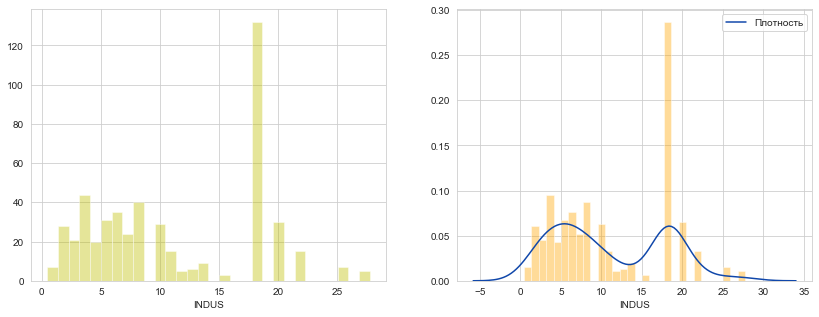

In [7]:
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(data['INDUS'], bins=30, kde=False,
             hist_kws={'color':'y'},
             ax=ax1
            )

sns.distplot(data['INDUS'], bins=30, kde=True,
             hist_kws={'color':'#FFA500'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
             ax=ax2
            )
plt.show()

Скорее логномальное.
****

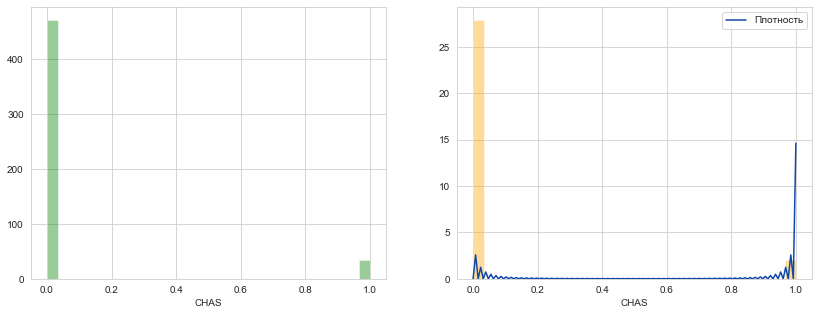

In [8]:
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(data['CHAS'], bins=30, kde=False,
             hist_kws={'color':'g'},
             ax=ax1
            )

sns.distplot(data['CHAS'], bins=30, kde=True,
             hist_kws={'color':'#FFA500'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
             ax=ax2
            )
plt.show()

Бернулли
****

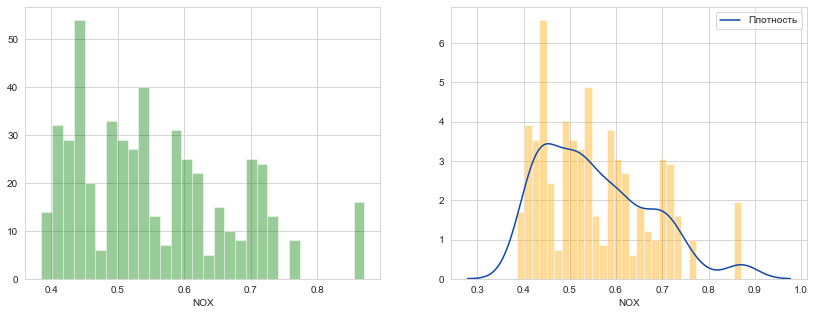

In [9]:
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(data['NOX'], bins=30, kde=False,
             hist_kws={'color':'g'},
             ax=ax1
            )

sns.distplot(data['NOX'], bins=30, kde=True,
             hist_kws={'color':'#FFA500'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
             ax=ax2
            )
plt.show()

Логнормальное
***

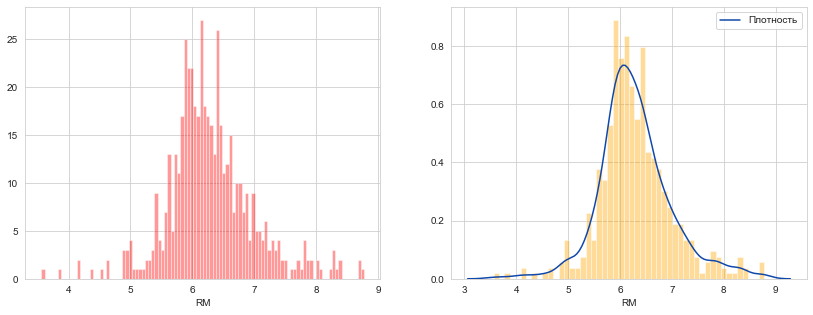

In [10]:
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(data['RM'], bins=100, kde=False,
             hist_kws={'color':'r'},
             ax=ax1
            )

sns.distplot(data['RM'], bins=50, kde=True,
             hist_kws={'color':'#FFA500'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
             ax=ax2
            )
plt.show()

Нормальное распределение
****

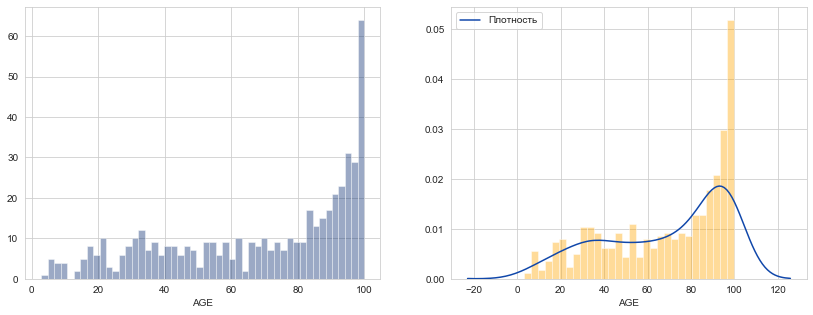

In [11]:
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(data['AGE'], bins=50, kde=False,
             hist_kws={'color':'#052A6E'},
             ax=ax1
            )

sns.distplot(data['AGE'], bins=30, kde=True,
             hist_kws={'color':'#FFA500'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
             ax=ax2
            )
plt.show()

Ассиметричное
***

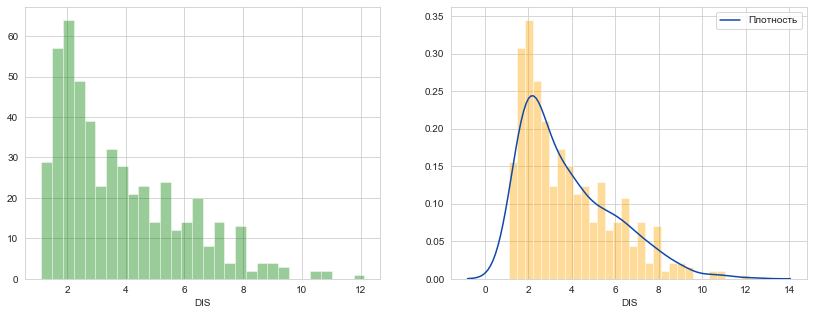

In [12]:
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(data['DIS'], bins=30, kde=False,
             hist_kws={'color':'g'},
             ax=ax1
            )

sns.distplot(data['DIS'], bins=30, kde=True,
             hist_kws={'color':'#FFA500'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
             ax=ax2
            )
plt.show()

Логнормальное
***

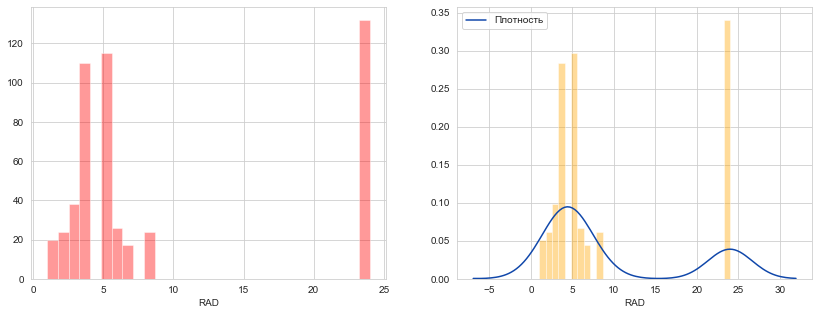

In [13]:
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(data['RAD'], bins=30, kde=False,
             hist_kws={'color':'r'},
             ax=ax1
            )

sns.distplot(data['RAD'], bins=30, kde=True,
             hist_kws={'color':'#FFA500'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
             ax=ax2
            )
plt.show()

Похоже на гипергеометрическое
***

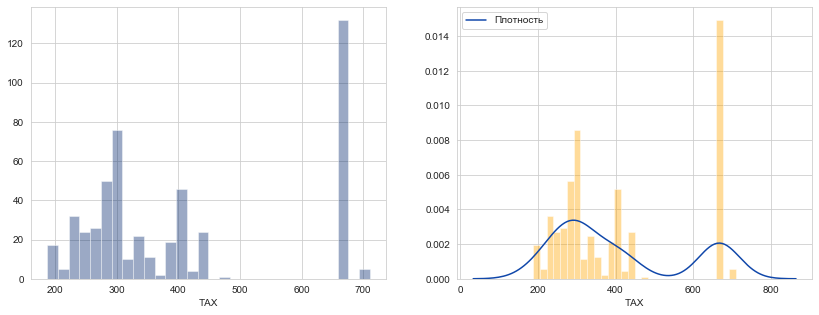

In [14]:
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(data['TAX'], bins=30, kde=False,
             hist_kws={'color':'#052A6E'},
             ax=ax1
            )

sns.distplot(data['TAX'], bins=30, kde=True,
             hist_kws={'color':'#FFA500'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
             ax=ax2
            )
plt.show()

Налог - дискретная величина, распределение биноминальное
***

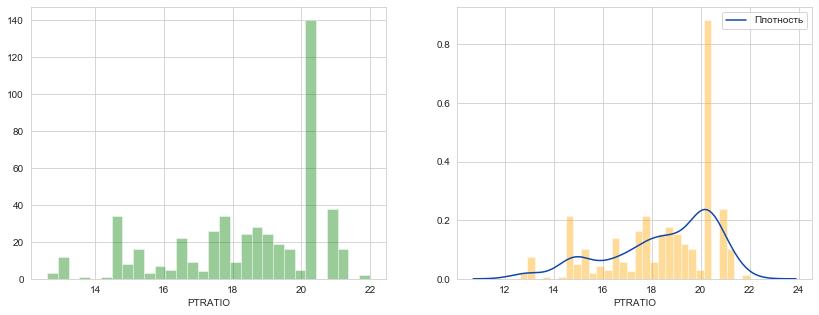

In [15]:
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(data['PTRATIO'], bins=30, kde=False,
             hist_kws={'color':'g'},
             ax=ax1
            )

sns.distplot(data['PTRATIO'], bins=30, kde=True,
             hist_kws={'color':'#FFA500'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
             ax=ax2
            )
plt.show()

Ассиметричное
***

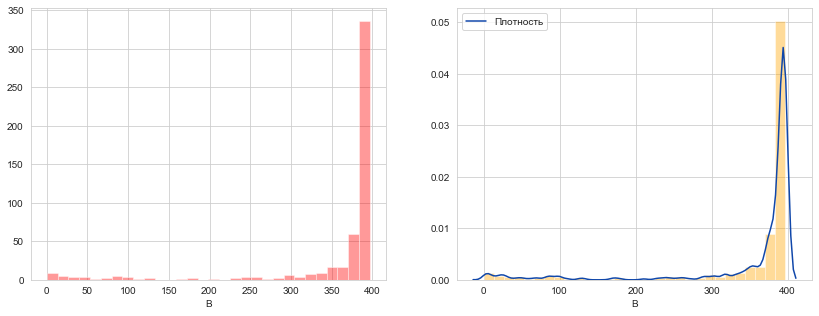

In [16]:
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(data['B'], bins=30, kde=False,
             hist_kws={'color':'r'},
             ax=ax1
            )

sns.distplot(data['B'], bins=30, kde=True,
             hist_kws={'color':'#FFA500'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
             ax=ax2
            )
plt.show()

Ассиметричное
***

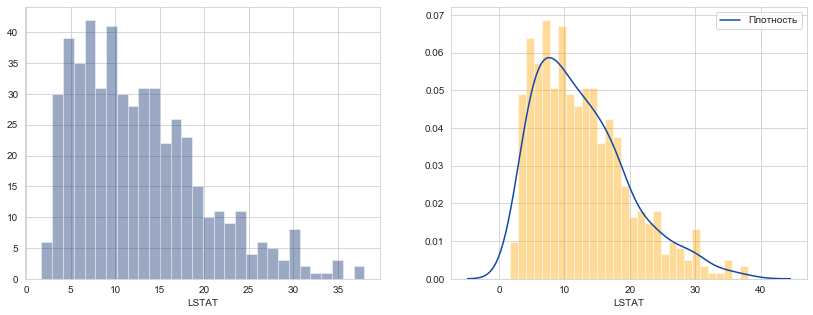

In [17]:
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(data['LSTAT'], bins=30, kde=False,
             hist_kws={'color':'#052A6E'},
             ax=ax1
            )

sns.distplot(data['LSTAT'], bins=30, kde=True,
             hist_kws={'color':'#FFA500'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
             ax=ax2
            )
plt.show()

Логнормальное
***

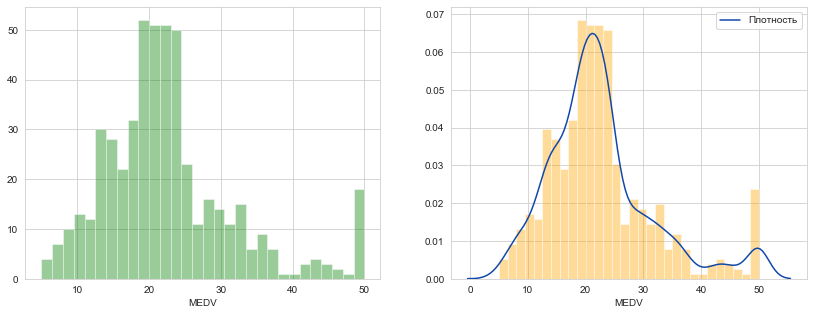

In [18]:
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(data['MEDV'], bins=30, kde=False,
             hist_kws={'color':'g'},
             ax=ax1
            )

sns.distplot(data['MEDV'], bins=30, kde=True,
             hist_kws={'color':'#FFA500'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
             ax=ax2
            )
plt.show()

Ближе к нормальному
***

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

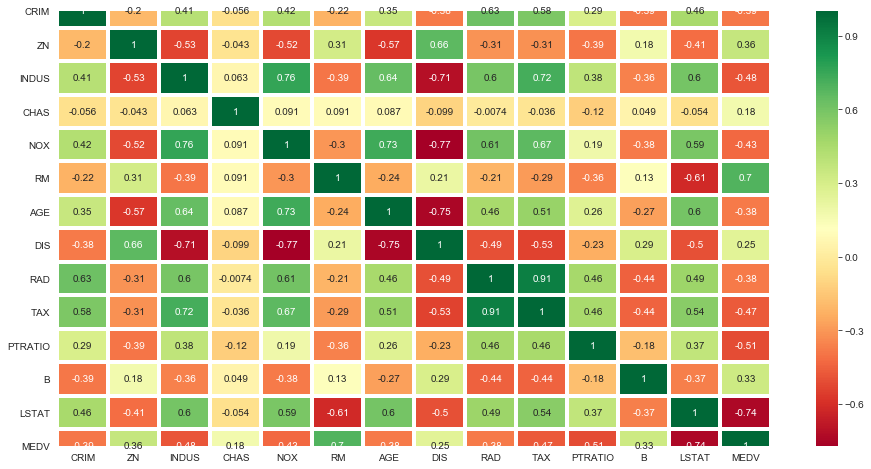

In [19]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=3.0)
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()

Больше всего средняя цена коррелирует с количеством комнат (RM) и с уровнем бедности и асоциальности (LSTAT)

Во втором случае, корреляция - отрицательная.

Text(0, 0.5, 'RM')

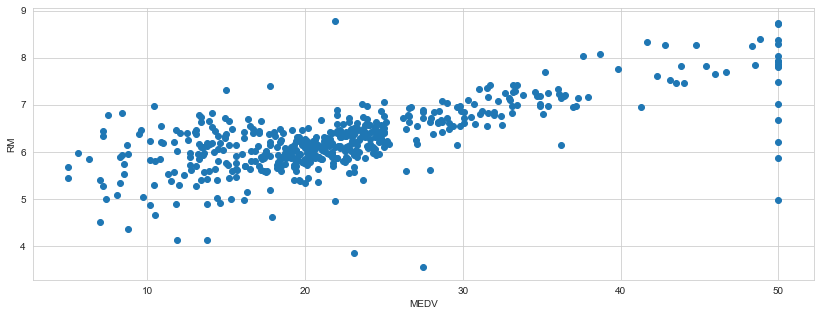

In [20]:
rm = data['RM']
medv = data['MEDV']
lstat= data['LSTAT']
plt.scatter(medv, rm)
rcParams['figure.figsize'] = 16,6
plt.xlabel('MEDV')
plt.ylabel('RM')

Text(0, 0.5, 'LSTAT')

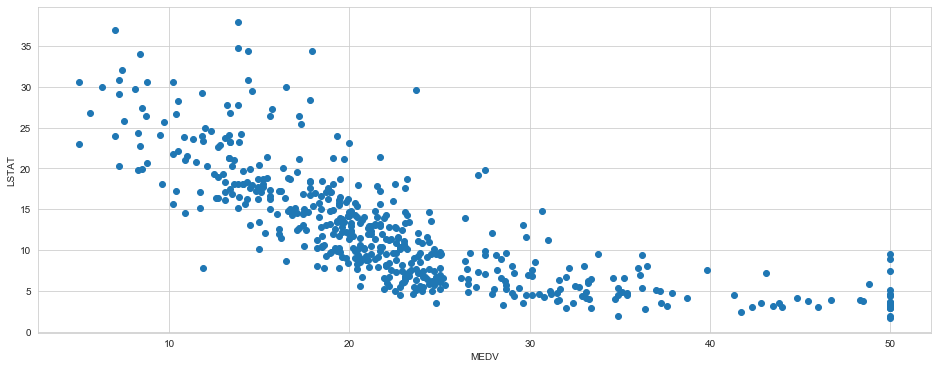

In [21]:
plt.scatter(medv, lstat)
plt.xlabel('MEDV')
plt.ylabel('LSTAT')

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 

In [22]:
medv = np.array(medv).reshape(-1,1)
lstat = np.array(lstat).reshape(-1,1)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



**1)**

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    medv,
    lstat,
    test_size = 0.2
)

**2)**

In [25]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
predicted_y = model.predict(X_test)

**3)**

In [27]:
#ошибка модели
model.score(X_test, y_test)

0.5421081711674953

**4)**

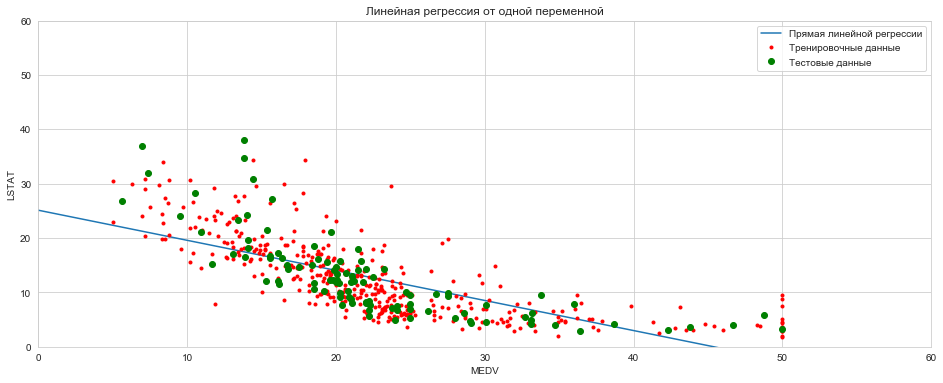

In [28]:
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.title('Линейная регрессия от одной переменной')

x = np.linspace(0, 60, 60)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [29]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [30]:
data['Country (region)'].isnull().sum()

0

In [31]:
# Проверяем, есть ли пустые ячейки в других столбцах
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

У Катара нет данных по многим показателям, поэтому удаляю его полностью. Остальные пробелы заполняю нулями.

In [32]:
data = data.drop(data[data['Country (region)'] == 'Qatar'].index)

In [33]:
data['Corruption'].fillna(0, inplace = True)
data['Log of GDP\nper capita'].fillna(0, inplace = True)
data['Healthy life\nexpectancy'].fillna(0, inplace = True)

In [34]:
# Проверяем, есть ли пустые ячейки
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             0
Negative affect             0
Social support              0
Freedom                     0
Corruption                  0
Generosity                  0
Log of GDP\nper capita      0
Healthy life\nexpectancy    0
dtype: int64

Сколько стран в выборке? -- **156**

In [35]:
data['Country (region)'].count()

155

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

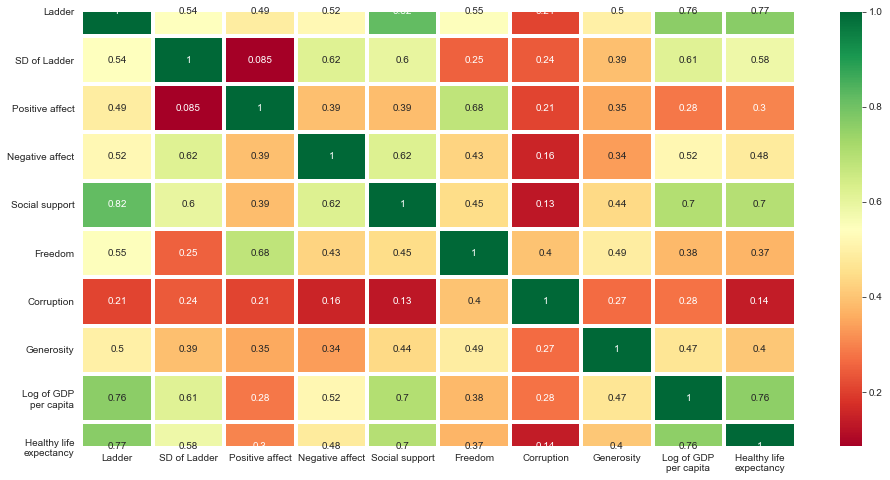

In [36]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=3.0)
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()

Самая большая корреляция между:
1) Социальной поддержкой (Social support) и степенью довольства своей жизнью (Ladder)
2) Уровнем ВВП на душу населения (Log of GDP per capita) и степенью довольства своей жизнью (Ladder)
3) Уровнем ВВП (Log of GDP per capita) и ожидаемой продолжительностью здоровой жизни (Healthy life expectancy)

Также большая корреляция между:
4) Социальной поддержкой (Social support) и ожидаемой продолжительностью жизни (Healthy life expectancy)
5) Социальной поддержкой (Social support) и Уровнем ВВП на душу населения (Log of GDP per capita)

Выводы:
социальная поддержка влияет на степень удовлетворенностью жизнью и ожидаемую продолжительность жизни.
а сама поддержка явно зависима от ВВП.

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [37]:
import numpy as np

In [38]:
dice_score = np.random.randint(1, 7, size=10)

In [39]:
sum(dice_score)

34

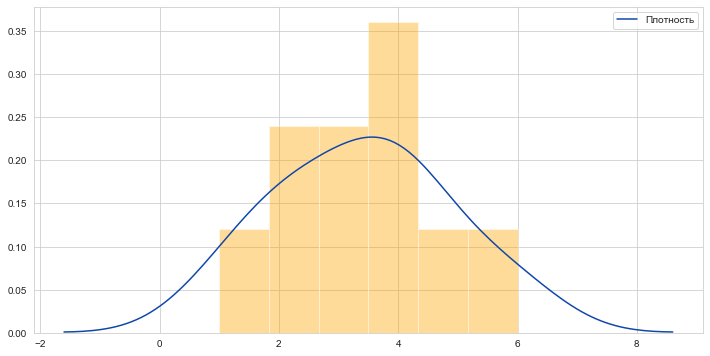

In [40]:
rcParams['figure.figsize'] = 12,6
sns.distplot(dice_score, bins=6, kde=True,
             hist_kws={'color':'#FFA500'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
            )
plt.show()

В данном случае, биноминальное распределение, поскольку кубик подбрасываем 10 раз, т.е. распределение отражает результаты 10 независимых экспериментов.

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

In [41]:
dice_score = []
for i in range(1000):
    dice_score += [sum(np.random.randint(1, 7, size=100))] 

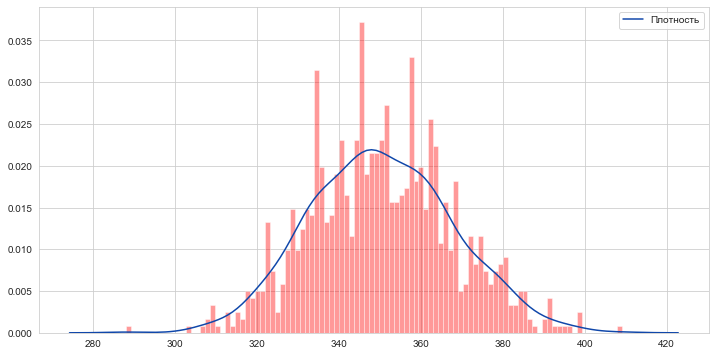

In [42]:
sns.distplot(dice_score, bins=100, kde=True,
             hist_kws={'color':'r'},             
             kde_kws={'color':'#1047AA', 'label':'Плотность'},
            )
plt.show()

В данном случае, распределение стремиться к нормальному.
Здесь работает центральная предельная теорема, подбрасывания кубика, это, фактически, сумма большого количества слабо
зависимых случайных величин, имеющих одинаковые масштабы.

In [44]:
#Тест Шапиро-Вилко на нормальное распределение
from scipy.stats import shapiro
stat, p = shapiro(dice_score)
print('stat=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
# 
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.998, p=0.276
Probably Gaussian


In [45]:
# Тест Д'Агостино
from scipy.stats import normaltest
stat, p = normaltest(dice_score)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=2.167, p=0.338
Probably Gaussian
